In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from sklearn import metrics 

In [2]:
#Read in csv dataset
df = pd.read_csv(os.path.join("NN_dataset.csv"))
df.set_index('Customer_ID', inplace=True)
df.head()

,Num_CC,Dependents,Status_Checking_Acc,Credit_History,Purposre_Credit_Taken,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Other_Inst_Plans,Housing,Job,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned,Default_On_Payment
Customer_ID,,,,,,,,,,,,,,,,,,
100001,2,1,A11,A34,A43,A65,A75,A93,A101,A143,A152,A173,A192,A201,B10,B20,B35,0
100002,1,1,A12,A32,A43,A61,A73,A92,A101,A143,A152,A173,A191,A201,B14,B22,B30,0
100003,1,2,A14,A34,A46,A61,A74,A93,A101,A143,A152,A172,A191,A201,B11,B20,B33,0
100004,1,2,A11,A32,A42,A61,A74,A93,A103,A143,A153,A173,A191,A201,B13,B23,B33,0
100005,2,2,A11,A33,A40,A61,A73,A93,A101,A143,A153,A173,A191,A201,B12,B21,B33,1


In [3]:
#Dropped columns with institution dependency and unclear data
df = df.drop(columns=['Num_CC', 'Dependents', 'Status_Checking_Acc', 'Credit_History', 'Savings_Acc', 'Marital_Status_Gender', 'Other_Inst_Plans ', 'Job'])
df.columns

Index(['Purposre_Credit_Taken', 'Years_At_Present_Employment',
       'Other_Debtors_Guarantors', 'Housing', 'Telephone', 'Foreign_Worker',
       'Duration_binned', 'Credit_amount_binned', 'Age_binned',
       'Default_On_Payment'],
      dtype='object')

In [4]:
#Set the target data and value names
target = df["Default_On_Payment"]
target_names = ["No Default", "Defaulted"]

In [5]:
#Create dataframe for just the features
data = df.drop("Default_On_Payment", axis=1)
feature_names = data.columns
data.head()

,Purposre_Credit_Taken,Years_At_Present_Employment,Other_Debtors_Guarantors,Housing,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned
Customer_ID,,,,,,,,,
100001,A43,A75,A101,A152,A192,A201,B10,B20,B35
100002,A43,A73,A101,A152,A191,A201,B14,B22,B30
100003,A46,A74,A101,A152,A191,A201,B11,B20,B33
100004,A42,A74,A103,A153,A191,A201,B13,B23,B33
100005,A40,A73,A101,A153,A191,A201,B12,B21,B33


In [6]:
#Label encode features dataframe
from sklearn.preprocessing import LabelEncoder

columnsToEncode = list(data)
le = LabelEncoder()

for feature in columnsToEncode:
    try:
        data[feature] = le.fit_transform(data[feature])
    except:
        print('Error encoding '+feature)
data.head()

,Purposre_Credit_Taken,Years_At_Present_Employment,Other_Debtors_Guarantors,Housing,Telephone,Foreign_Worker,Duration_binned,Credit_amount_binned,Age_binned
Customer_ID,,,,,,,,,
100001,4,4,0,1,1,0,0,0,5
100002,4,2,0,1,0,0,4,2,0
100003,7,3,0,1,0,0,1,0,3
100004,3,3,2,2,0,0,3,3,3
100005,0,2,0,2,0,0,2,1,3


In [7]:
#Split the data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [8]:
#Create Support Vector Classification model and fit the training data
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
#Run testing data through model and score accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.772


In [10]:
#Use Grid Search function to hypertune C and gamma parameters
from sklearn.model_selection import GridSearchCV
cs = [10**i for i in range(0,5)]
g = [10**i for i in range(-5,0)]
param_grid = {'C': cs, 'gamma':g}
grid = GridSearchCV(model, param_grid, verbose=4)

In [11]:
#Run all combinations of variables using training data
grid.fit(X_train, y_train)

C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, gamma=1e-05 ................................................
[CV] .................... C=1, gamma=1e-05, score=0.704, total=   0.3s
[CV] C=1, gamma=1e-05 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .................... C=1, gamma=1e-05, score=0.704, total=   0.3s
[CV] C=1, gamma=1e-05 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .................... C=1, gamma=1e-05, score=0.705, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.704, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.704, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.705, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.704, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.704, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.705, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.707, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[CV] ................ C=10000, gamma=1e-05, score=0.704, total=   0.5s
[CV] C=10000, gamma=1e-05 ............................................
[CV] ................ C=10000, gamma=1e-05, score=0.705, total=   0.5s
[CV] C=10000, gamma=0.0001 ...........................................
[CV] ............... C=10000, gamma=0.0001, score=0.712, total=   0.7s
[CV] C=10000, gamma=0.0001 ...........................................
[CV] ............... C=10000, gamma=0.0001, score=0.703, total=   0.7s
[CV] C=10000, gamma=0.0001 ...........................................
[CV] ............... C=10000, gamma=0.0001, score=0.707, total=   0.7s
[CV] C=10000, gamma=0.001 ............................................
[CV] ................ C=10000, gamma=0.001, score=0.747, total=   2.0s
[CV] C=10000, gamma=0.001 ............................................
[CV] ................ C=10000, gamma=0.001, score=0.732, total=   2.3s
[CV] C=10000, gamma=0.001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [12]:
#Find the best parameters for the data set
print(grid.best_params_)
print(grid.best_score_)

{'C': 10000, 'gamma': 0.1}
0.9232


In [13]:
#Create a new model with the hypertuned parameters
model = SVC(kernel='rbf', C = grid.best_estimator_.C, gamma = grid.best_estimator_.gamma)
model.fit(X_train, y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
#Find the accuracy of the testing data for the new model
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.935


In [15]:
#Print classificatin report for hypertuned model
from sklearn.metrics import classification_report
predictions = model.predict(X_test)

print(classification_report (y_test, predictions, target_names=target_names))


              precision    recall  f1-score   support

  No Default       0.94      0.97      0.95       864
   Defaulted       0.92      0.87      0.89       386

    accuracy                           0.94      1250
   macro avg       0.93      0.92      0.92      1250
weighted avg       0.93      0.94      0.93      1250



In [16]:
#Create function to plot an ROC (Receiver Operating Characteristic) curve
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
predictprob = model.decision_function(X_test)

def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")
    plt.show()

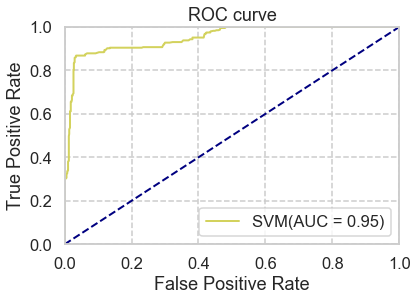

In [17]:
plotAUC(y_test,predictprob, 'SVM')

In [18]:
#Create function to calculate Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["No Default", "Defaulted"]
    
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylim(-0.5,1.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

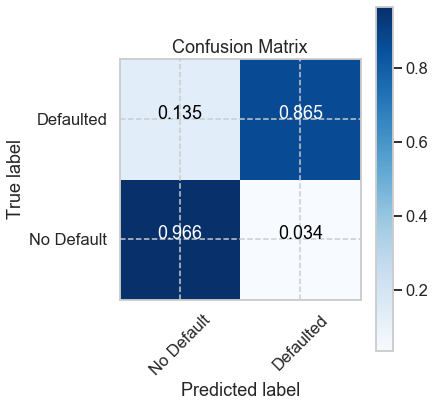

In [19]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=True)

In [20]:
#Save model
from sklearn.externals import joblib
joblib.dump(model,'svm_model.h5')

C:\Users\Aly\Anaconda3\envs\PythonData\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['svm_model.h5']